# Clustering
Below shows examples of clustering using hierarchical and CURE clustering methods in kdb+/q.

### Dependencies
To run the below notebook, the following dependencies are required.
- embedPy
- matplotlib
- matplot3d
- pyclustering

In [1]:
\l clust.q
plt:.p.import`matplotlib.pyplot

In [2]:
plot:{
 subplots::plt[`:subplots][3;4];
 fig::subplots[@;0];
 axarr::subplots[@;1];
 fig[`:set_size_inches;18.5;10.5];
 {[d;c;f;i]
  r:.clust.hc[d;c;] . f;
  j:cross[til 3;til 4]i;
  box:axarr[@;j 0][@;j 1];
  {x[`:scatter][;]. flip y}[box]each exec pts by clt from r;
  box[`:set_title]"Distance/Linkage:",string[f 0],"/",string f 1;
  }[x;y]'[z;til 12];
 plt[`:show][];
 }


### Example 1

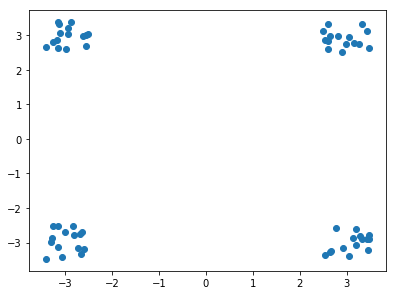

In [3]:
d1:(60#"F";",")0:`:../data/ss5.csv
plt[`:scatter][;]. flip d1;
plt[`:show][];

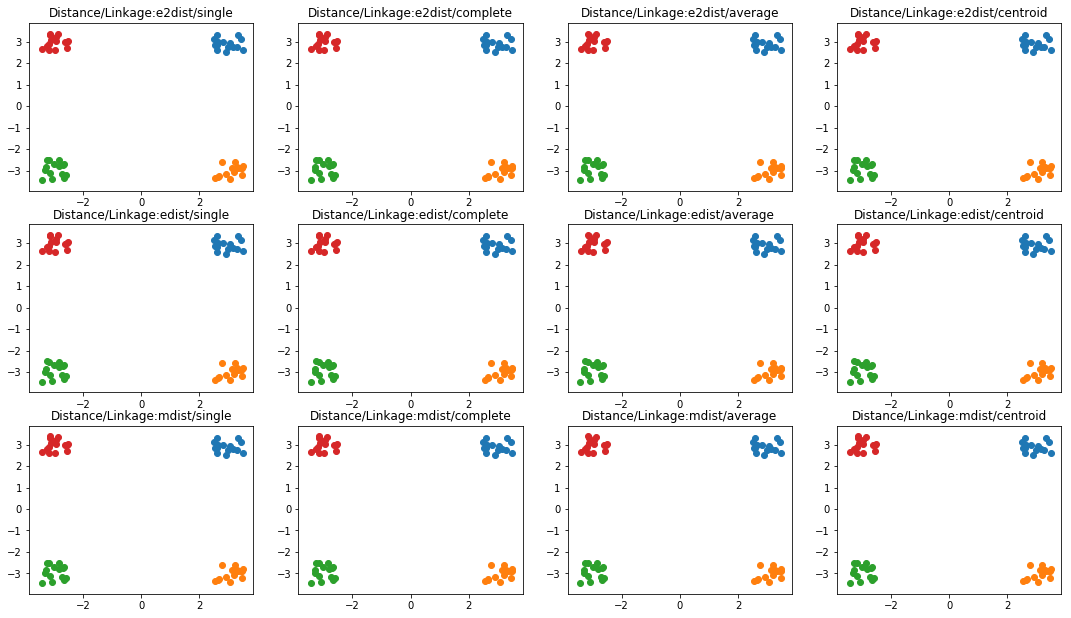

In [4]:
plot[d1;4;cross[key .clust.kd.i.dd;-1_key .clust.kd.i.ld]];

32 20656


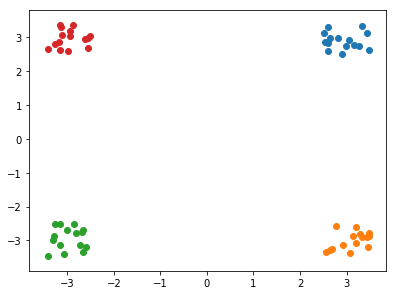

In [5]:
\ts r1:.clust.hc[d1;4;`e2dist;`single]
{plt[`:scatter][;]. flip x}each exec pts by clt from r1;
plt[`:show][];

4 18736


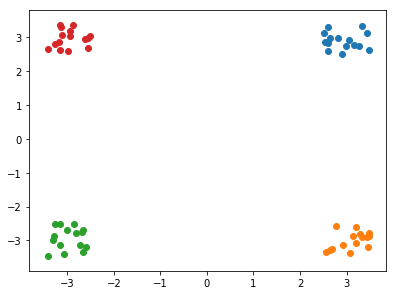

In [6]:
\ts r1:.clust.hc[d1;4;`e2dist;`ward]
{plt[`:scatter][;]. flip x}each exec pts by clt from r1;
plt[`:show][];

32 51488


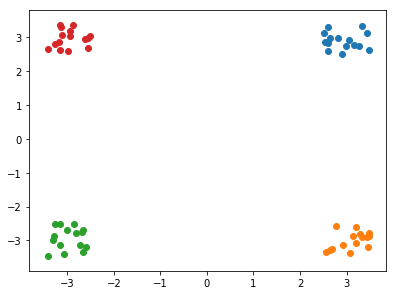

In [7]:
\ts r1:.clust.cure[d1;4;5;0]
{plt[`:scatter][;]. flip x}each exec pts by clt from r1;
plt[`:show][];

### Example 2

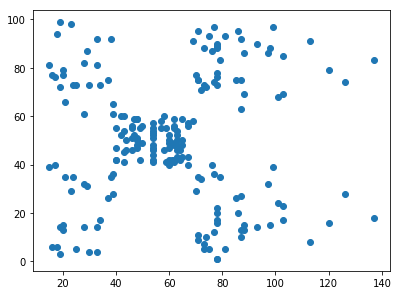

In [8]:
d2:("SSFFF";(),",")0:`:../data/cust.csv
d2:flip d2`Income`SpendingScore
plt[`:scatter][;]. flip d2;
plt[`:show][];

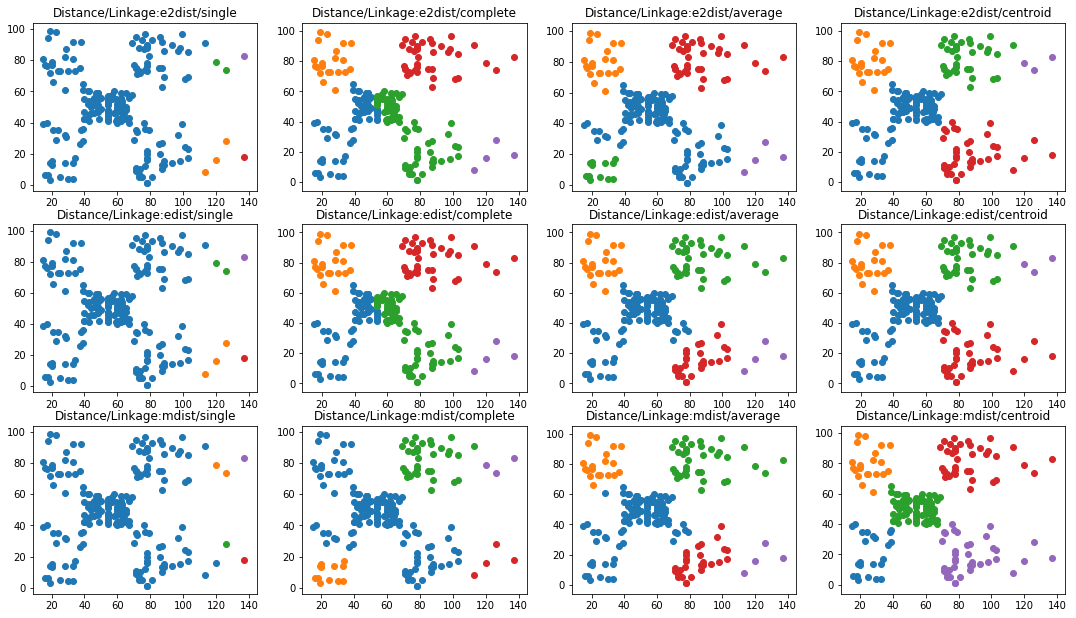

In [9]:
plot[d2;5;cross[key .clust.kd.i.dd;-1_key .clust.kd.i.ld]];

49 59216


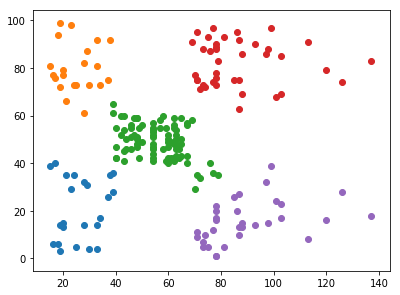

In [10]:
\ts r2:.clust.hc[d2;5;`e2dist;`ward]
{plt[`:scatter][;]. flip x}each exec pts by clt from r2;
plt[`:show][];

291 232272


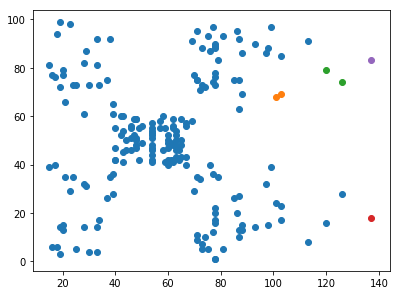

In [11]:
\ts r2:.clust.cure[d2;5;10;0]
{plt[`:scatter][;]. flip x}each exec pts by clt from r2;
plt[`:show][];

### Example 3

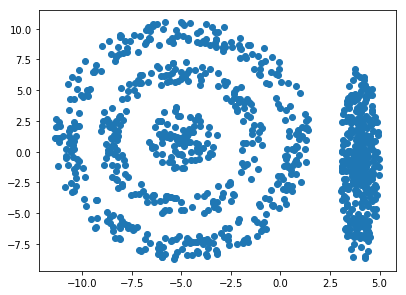

In [12]:
datapts:1000
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
data :flip(-5 1)+(1 1.5)*dsc[1000; 0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
data,:flip(4 -1)+(1 8)*dsc[4000; 0;1.]
data@:neg[datapts&count data]?count data
d3:data
plt[`:scatter][;]. flip d3;
plt[`:show][];

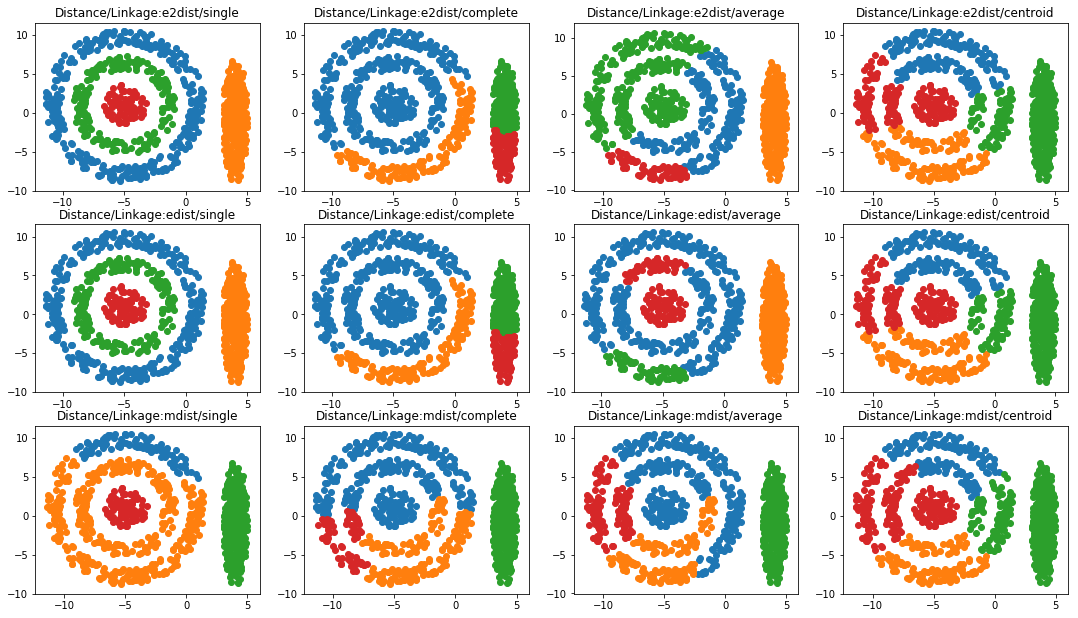

In [13]:
plot[d3;4;cross[key .clust.kd.i.dd;-1_key .clust.kd.i.ld]];

1201 248416


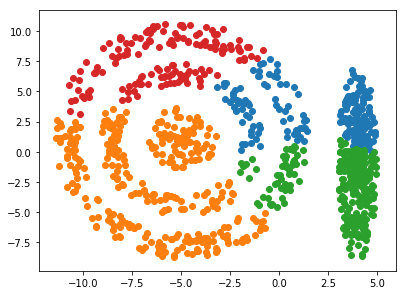

In [14]:
\ts r3:.clust.hc[d3;4;`e2dist;`ward]
{plt[`:scatter][;]. flip x}each exec pts by clt from r3;
plt[`:show][];

4799 2402800


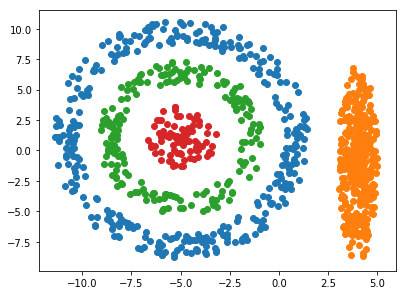

In [15]:
\ts r3:.clust.cure[d3;4;30;0]
{plt[`:scatter][;]. flip x}each exec pts by clt from r3;
plt[`:show][];

### Example 4

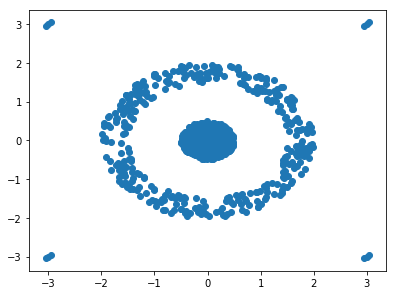

In [16]:
fcps:.p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES
read:.p.import[`pyclustering.utils]`:read_sample
d4:read[fcps`:SAMPLE_TARGET]`
plt[`:scatter][;]. flip d4;
plt[`:show][];

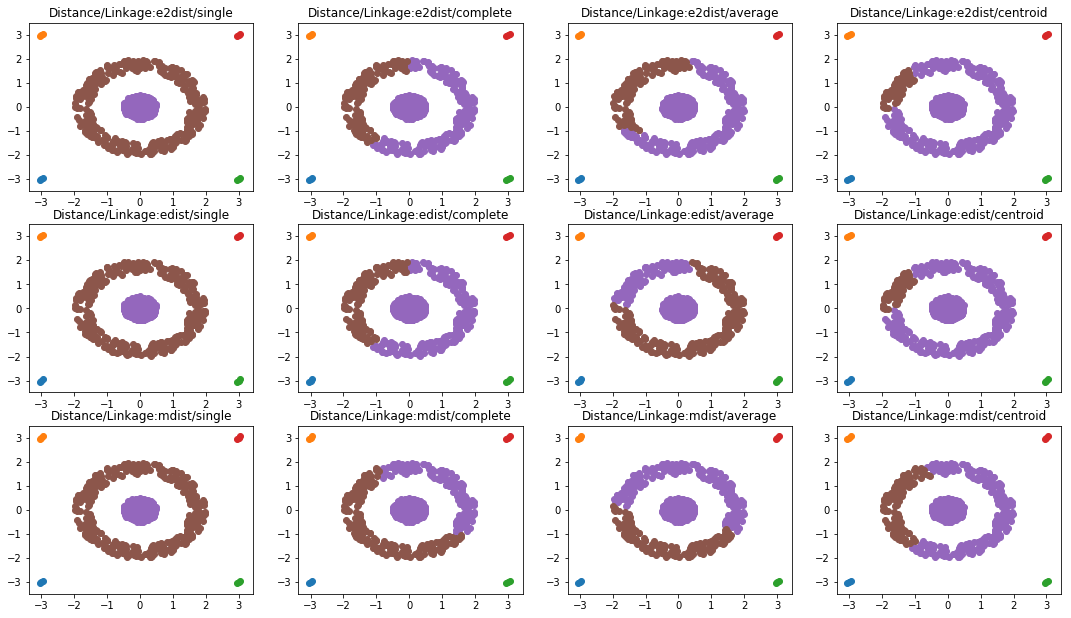

In [17]:
plot[d4;6;cross[key .clust.kd.i.dd;-1_key .clust.kd.i.ld]];

705 226416


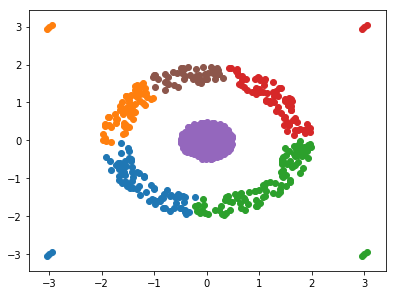

In [18]:
\ts r4:.clust.hc[d4;6;`e2dist;`ward]
{plt[`:scatter][;]. flip x}each exec pts by clt from r4;
plt[`:show][];

3455 1944528


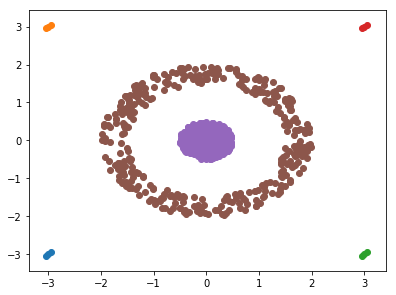

In [19]:
\ts r4:.clust.cure[d4;6;30;0]
{plt[`:scatter][;]. flip x}each exec pts by clt from r4;
plt[`:show][];

### Example 5 - 3D

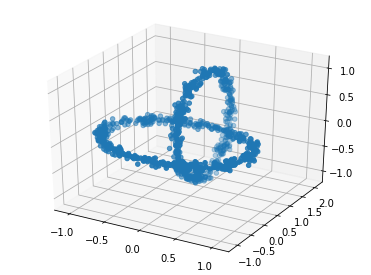

In [20]:
d5:read[fcps`:SAMPLE_CHAINLINK]`
.p.import[`mpl_toolkits.mplot3d]`:Axes3D;
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][;;]. flip d5;
plt[`:show][];

In [21]:
plot3D:{
 fig::plt[`:figure][];
 fig[`:set_size_inches;18.5;10.5];
 {[d;c;f;i]
  ax:fig[`:add_subplot][3;4;i+1;`projection pykw"3d"];
  r:.clust.hc[d;c;] . f;
  {x[`:scatter][;;]. flip y}[ax]each exec pts by clt from r;
  ax[`:set_title]string[f 0],"/",string f 1;
  }[x;y]'[z;til 12];
 plt[`:show][];
 }

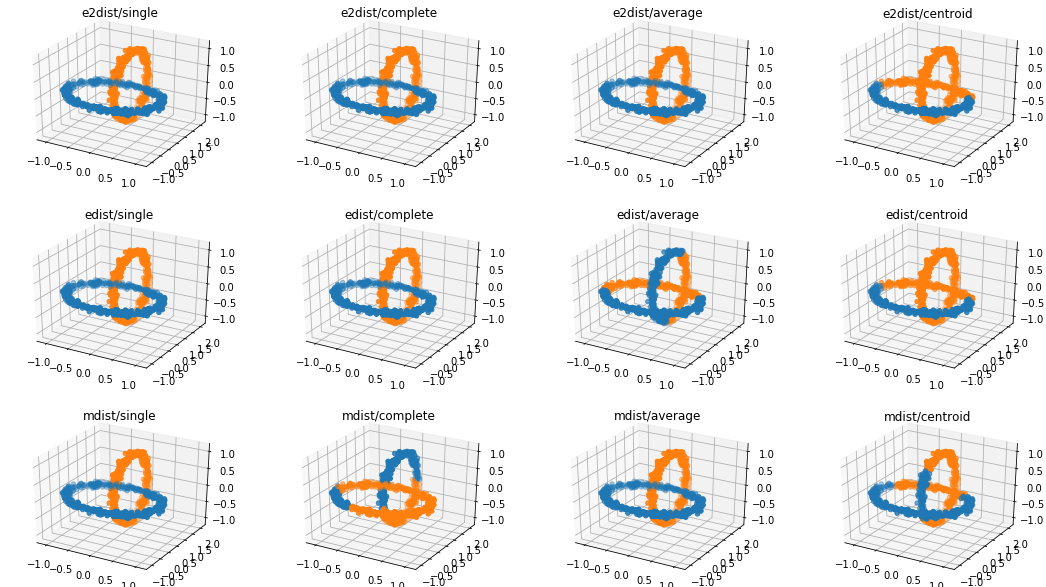

In [22]:
plot3D[d5;2;cross[key .clust.kd.i.dd;-1_key .clust.kd.i.ld]];

1251 280368


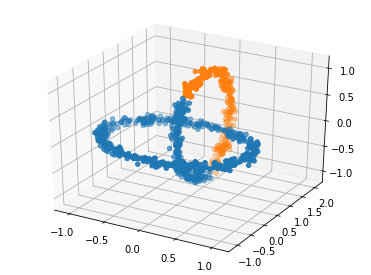

In [23]:
\ts r5:.clust.hc[d5;2;`e2dist;`ward]
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
{ax[`:scatter][;;]. flip x}each exec pts by clt from r5;
plt[`:show][];

5844 3420816


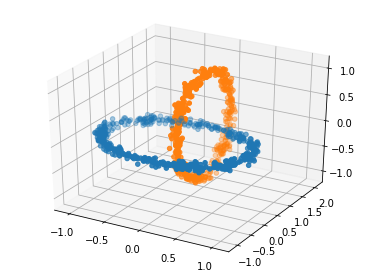

In [24]:
\ts r5:.clust.cure[d5;2;30;0]
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
{ax[`:scatter][;;]. flip x}each exec pts by clt from r5;
plt[`:show][];

---